## Logistic regression
- 지도 -> 데이터(Feature 특성) + 타겟(라벨/정답)
    - 분류 : 카테고리/범주 나누기
    - 회귀 : 숫자(수치) 정답
- 비지도 -> 데이터(Feature 특성, 속성)
    - 결과 평가 X -> 지도학습으로 이어질 수 있음
- 강화 -> 데이터(Feature 특성, 속성)
    - ex. 피드백 (게임, 걸음걸이)

# scikit-learn ML 기본 동작
3. 학습 위한 데이터 준비
- 데이터셋
    - 학습용 데이터셋 -> 학습에 사용
    - 검증용 데이터셋 -> 모델 생성 중에 사용
    - 테스트용 데이터셋 -> 모델 완성 후 사용
4. 학습 모델 생성
- 학습 방법 선정 및 모델 객체 생성
- 학습 진행
    - __모델 파라미터__ 최적화 -> 학습에 의해서 결정되는 파라미터
    - 최적의 모델 파라미터를 찾기 위한 방법 -> 최적화(optimizer)
    - ex. W: 가중치, b: 절편
- 모델 평가
    - 성능 개선 -> __하이퍼 파라미터__ (모델마다 다름)  -> 모델 튜닝
    - ex. kNN -> k, 학습횟수, 학습크기, 규제 값들
5. 모델 테스트
    - 학습에 사용되지 않은 데이터
    - 새로운 데이터로 테스트 진행

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## 데이터 준비- 시간 : 점수
x = [2,4,6,8,10,12]
y = [40,50,60,70,80,90]

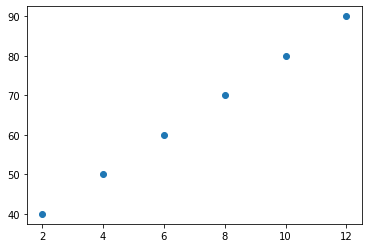

In [3]:
# EDA -> 시각화
plt.scatter(x,y)
plt.show()

# 시간과 점수는 비례 관계 
# 선형의 데이터 분포, 독립변수 -> hour, 종속변수 -> score

### 데이터 변환
- pandas 방법
- numpy 방법

In [4]:
# pandas 방법
df = pd.DataFrame([x,y])
print(df.shape)
df = df.T
df = df.rename({0: 'hour', 1: 'score'}, axis=1) 
print(df)

(2, 6)
   hour  score
0     2     40
1     4     50
2     6     60
3     8     70
4    10     80
5    12     90


In [5]:
arrx = np.array(x)
arry = np.array(y)
arrx = arrx.reshape(-1,1)
arrx.shape

(6, 1)

### 선형모델 생성
- 데이터 + 라벨 -> 지도학습
- 선형 데이터 분포 -> 선형 모델 적용

In [6]:
# 모델 객체 생성
model = LinearRegression()

# 학습 -> training data, fit()메서드: 2차원 데이터 필요
model.fit(arrx, arry)

LinearRegression()

### 모델 파라미터 -> 가중치, 절편 등

In [7]:
print(model.coef_, model.intercept_)

[5.] 30.0


### 모델 평가 -> score함수 사용
- 분류 : __정확도__
- 회귀 : 정답 - 예측 차이
    - 손실함수(loss/cost function): MSE, MAE, RMSE - 낮을 수록 좋음
    - __R^2__ 계수 : 0 ~ 1 높을수록 <span color ='blue'>좋음 </span>

In [8]:
# 회귀 -> 결정계수 R^2
model.score(arrx,arry)

1.0

### 오차 확인 -> sklearn.metrics의 mean_absolute_error, mean_squared_error 사용

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
preY = model.predict(arrx)
mae = mean_absolute_error(arry, preY)
mse = mean_squared_error(arry, preY)

print(mae, mse)

0.0 0.0


## 뉴욕시의 taxi 데이터 활용한 예측 모델
- 데이터셋 : 캐글의 데이터 선정
- 조건 : 뉴욕시 내
    - 거리에 따른 요금 예측 -> 회귀
    - 승차에 따른 하차 예측 -> 분류 : KNN 또는 로지스틱

### 1. 데이터 로딩

In [10]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [11]:
df = pd.read_csv('../home/data/train.csv', nrows=5000, parse_dates=['pickup_datetime'])
df.head(10)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1
5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45+00:00,-74.000964,40.731630,-73.972892,40.758233,1
6,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00+00:00,-73.980002,40.751662,-73.973802,40.764842,1
7,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00+00:00,-73.951300,40.774138,-73.990095,40.751048,1
8,2012-12-03 13:10:00.000000125,9.0,2012-12-03 13:10:00+00:00,-74.006462,40.726713,-73.993078,40.731628,1
9,2009-09-02 01:11:00.00000083,8.9,2009-09-02 01:11:00+00:00,-73.980658,40.733873,-73.991540,40.758138,2


In [12]:
df.info()
df.drop('key', axis=1, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                5000 non-null   object             
 1   fare_amount        5000 non-null   float64            
 2   pickup_datetime    5000 non-null   datetime64[ns, UTC]
 3   pickup_longitude   5000 non-null   float64            
 4   pickup_latitude    5000 non-null   float64            
 5   dropoff_longitude  5000 non-null   float64            
 6   dropoff_latitude   5000 non-null   float64            
 7   passenger_count    5000 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 312.6+ KB


### 2. 결측치 및 이상치 체크

In [13]:
df.isnull().sum()
print(df.describe())

       fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count  5000.000000       5000.000000      5000.000000        5000.000000   
mean     11.296238        -72.426826        39.867237         -72.426130   
std       9.710106         10.722381         6.351342          10.722293   
min      -2.900000        -74.438233       -73.991840         -74.429332   
25%       6.000000        -73.992449        40.734045         -73.991349   
50%       8.500000        -73.982069        40.752128         -73.980196   
75%      12.500000        -73.967040        40.766890         -73.963589   
max     180.000000         40.751582        41.366138          40.758867   

       dropoff_latitude  passenger_count  
count       5000.000000      5000.000000  
mean          39.875767         1.631000  
std            6.326084         1.257122  
min          -73.979010         0.000000  
25%           40.734379         1.000000  
50%           40.753512         1.000000  
75%           

### 거리 컬럼 생성

In [14]:
df['distance'] = ((df['pickup_longitude']- df['dropoff_longitude'])**2 + (df['pickup_latitude']- df['dropoff_latitude'])**2)**(1/2)
df.head(10)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,0.009436
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,0.079696
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0.013674
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,0.025340
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,0.019470
5,12.1,2011-01-06 09:50:45+00:00,-74.000964,40.731630,-73.972892,40.758233,1,0.038675
6,7.5,2012-11-20 20:35:00+00:00,-73.980002,40.751662,-73.973802,40.764842,1,0.014565
7,16.5,2012-01-04 17:22:00+00:00,-73.951300,40.774138,-73.990095,40.751048,1,0.045146
8,9.0,2012-12-03 13:10:00+00:00,-74.006462,40.726713,-73.993078,40.731628,1,0.014258
9,8.9,2009-09-02 01:11:00+00:00,-73.980658,40.733873,-73.991540,40.758138,2,0.026593


In [16]:
# 이상치 제거
df.drop(4783, inplace=True)

In [27]:
# 위도, 경도 -> 주소 추출 ()
# import requests, json
# def lat_lon_to_addr(lon,lat):
#     url = 'https://dapi.kakao.com/v2/local/geo/coord2regioncode.json?x={longitude}&y={latitude}'.format(longitude=lon,latitude=lat)
#     headers = {"Authorization": "KakaoAK 75196a7c62313e8fde3a2e1ebeae56d4"}
#     result = json.loads(str(requests.get(url, headers=headers).text))
#     print(result)
#     match_first = result['documents'][0]['address_name']
#     return str(match_first)

# print(lat_lon_to_addr(-73.841610, 40.712278))

{'code': -2, 'msg': 'The input parameter value is not in the service area'}


KeyError: 'documents'

In [21]:
data = df[['distance']]
fare = df['fare_amount']

In [24]:
train_data, test_data, train_fare, test_fare = train_test_split(data, fare, random_state=42)

lr = LinearRegression()
lr.fit(train_data, train_fare)

LinearRegression()

In [25]:
print(lr.score(train_data, train_fare))
print(lr.score(test_data, test_fare))

0.001545319596624739
-0.005309426746381574
